In [35]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'## imcsv filepoort of 
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')
import pandas as pd
import jovian
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
medical_df=pd.read_csv('medical.csv')
medical_df.age.describe()
medical_df.info()
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title="age and charges")
fig.update_traces(marker_size=5)
fig.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [37]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [38]:
smoker_values={'no': 0, 'yes':1} ## conversion for given data in the numeric form
smoker_numeric=medical_df.smoker.map(smoker_values)### map fuction applies it to whole data
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [39]:
medical_df.charges.corr(smoker_numeric) ### finds corelatiin betwwn smoker and charges

np.float64(0.7872514304984778)

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

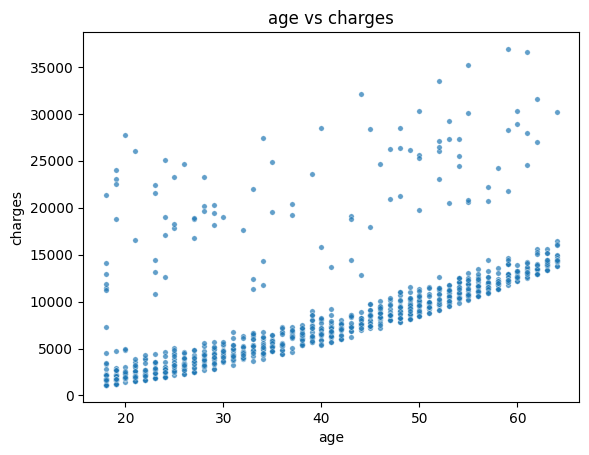

In [40]:
non_smoker_df= medical_df[medical_df.smoker=='no'] ## dtaframe of only non smokers
plt.title('age vs charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)### as we can see it follows straight line and it is linear regression model


In [41]:
def estimate_charges(age,w,b):
    return w*age+b

In [42]:
estimate_charges(30,w,b)

NameError: name 'w' is not defined

In [43]:
def try_parameter(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    estimated_charges=estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.legend(['estimate','actual'])

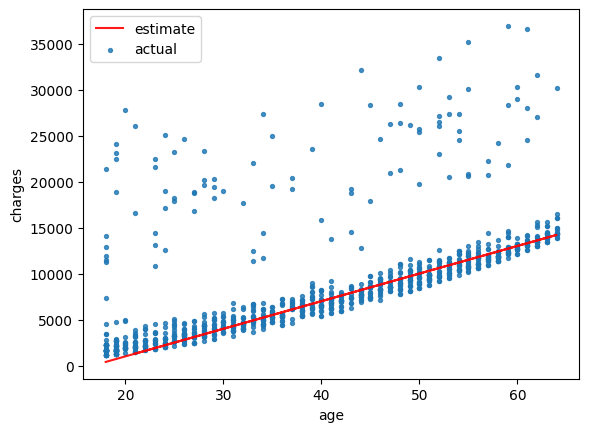

In [44]:
try_parameter(300,-5000)

In [ ]:
targets=non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [45]:
predictions=estimate_charges
predictions

<function __main__.estimate_charges(age, w, b)>

In [46]:
import numpy as np
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [47]:
predicted=estimate_charges(non_smoker_df.age,w,b)

NameError: name 'w' is not defined

In [48]:
rmse(targets,predicted)

NameError: name 'predicted' is not defined

In [ ]:
def try_parameters(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    predictions=estimate_charges(ages,w,b)
    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.legend(['prediction','actual'])
    loss=rmse(targets,predictions)
    print(loss)



In [ ]:
try_parameters(3000,-2000)

NameError: name 'try_parameters' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],[37],[61]]))

NameError: name 'np' is not defined

In [ ]:
predictions=model.predict(inputs)
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [53]:
fig =px.strip(non_smoker_df,x="children",y="charges")
fig.show()

In [63]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges')
fig.show()

In [51]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

4608.470405038246


<Axes: xlabel='smoker_codes', ylabel='charges'>

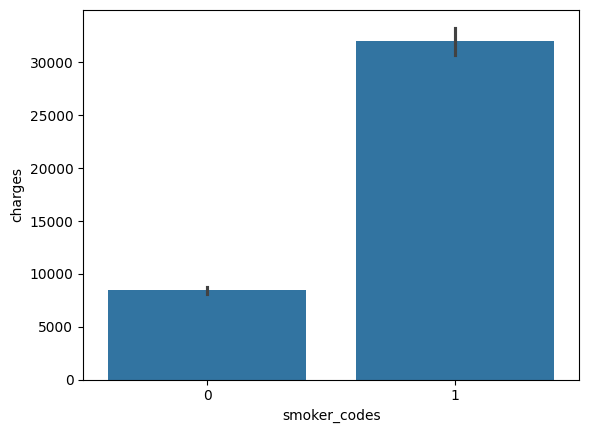

In [75]:
sns.barplot(data=medical_df,x='smoker_codes',y='charges')

In [73]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [72]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [62]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

4608.470405038246


In [66]:
sex_codes={'female':0,'male':1}
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [77]:
inputs,targets=medical_df[['age','bmi','children','sex_code']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

11336.133773688362


In [78]:
inputs,targets=medical_df[['age','bmi','children','sex_code','smoker_codes']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

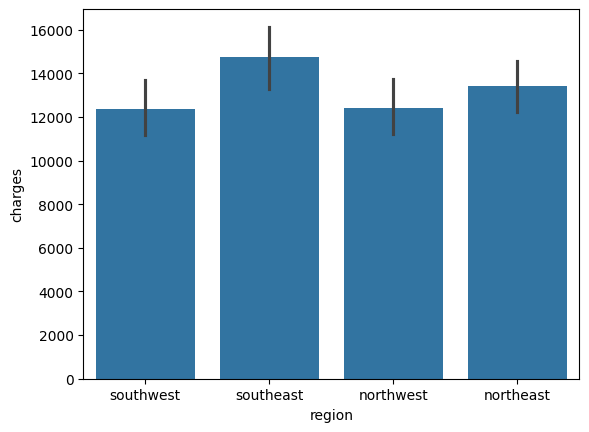

In [79]:
sns.barplot(data=medical_df,x='region',y='charges')

In [81]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])


OneHotEncoder()

In [85]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot
medical_df[['northeast','northwest','southeast','southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


In [86]:
inputs,targets=medical_df[['age','bmi','children','sex_code','smoker_codes','northeast','northwest','southeast','southwest']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

6041.679651174452


In [87]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])